 
Now we will do a more realistic exercise using k-means clustering.
We have a Dataframe containing the customers of a given store where we have their personal information and their annual income and spending score, the spending score depends on how much they have spent in this store. The higher the number, the higher the amount.

We would like to group these customers based on their annual income and spending score.

In [4]:
import pandas as pd
customers = pd.read_csv('customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. We extract the last two columns of the whole dataframe and assign the values of the column "Annual income" to the x variable and "Spending score" to the y variable.
2. We plot the samples.

Text(0, 0.5, 'Spending Score')

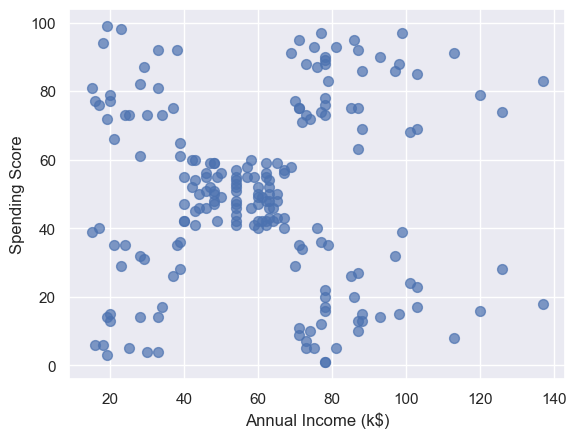

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

3. We define how many clusters would be optimal.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

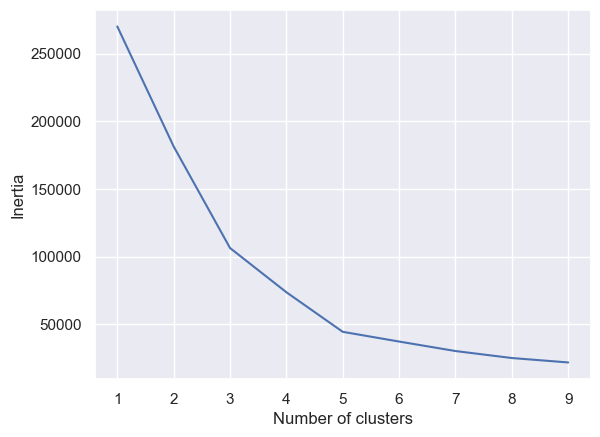

In [6]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

4. Then we train the model and perform the grouping of people by Spending score and Anual income

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


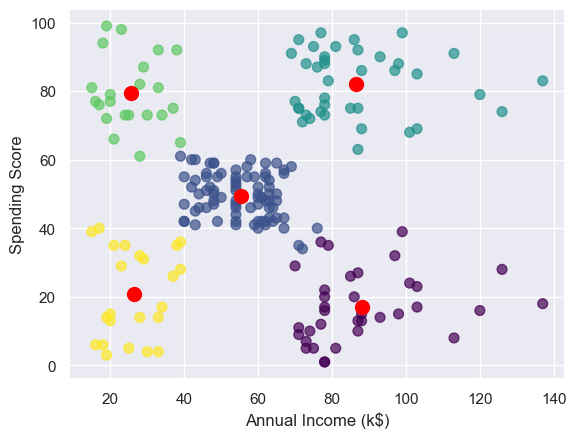

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

5. We add the cluster number where each sample was assigned by the clustering performed  to a new column on the dataframe so it is easier for us to searh through the data.

In [8]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Usability case: If we wanted to make a promotion to increase spending, a good target group would be those subjects who have a high income and a low spending score. so we get the number assigned to the cluster where these people might be and then we get the ID's of such people.

In [9]:
import numpy as np
# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]
# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]
# Show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)